In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [4]:
boone_dir = '/n/netscratch/dvorkin_lab/Lab/kboone/cmb_conv/OLD/'
fid_dir = boone_dir + 'cls_noiseless/'

all_files = np.array(os.listdir(fid_dir))
fid_inds = [i for i, s in enumerate(all_files) if s.startswith('f')]
fid_files = all_files[fid_inds]

Cls = np.zeros((len(fid_files), 3072), dtype = np.float64)
for i in np.arange(len(fid_files)):
    Cls[i] = np.load(fid_dir + fid_files[i])
ave_sig = np.average(Cls, axis = 0)

/n/home09/kboone/.conda/envs/cmb_cls/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/n/home09/kboone/.conda/envs/cmb_cls/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [12]:
noise_ACT = np.loadtxt('../Data/Map_Noise/ACT_noise.txt')[:,1]
noise_ACT = noise_ACT[:np.where(noise_ACT < 1e-9)[0][0]]

In [13]:
noise_ACT

array([8.41665448e-08, 8.41665448e-08, 8.41665448e-08, ...,
       6.81542827e-07, 6.82368703e-07, 6.83194578e-07])

In [16]:
noise = np.ones(3072)
noise[:len(noise_ACT)] = noise_ACT
noise

array([8.41665448e-08, 8.41665448e-08, 8.41665448e-08, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

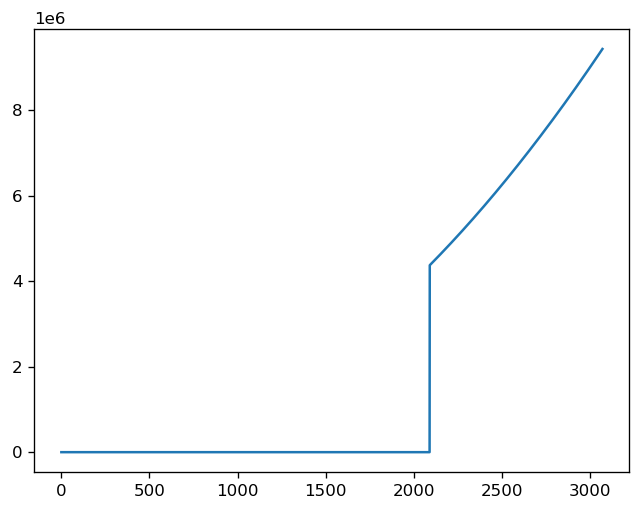

In [17]:
ls = np.arange(3072)

plt.figure(dpi = 120)
plt.plot(ls, ls*(ls+1)*noise)
plt.show()

In [34]:
N = 1e7
x = [34.19233078337337	,71.86940802505276	,127.50974815233886	,208.08224631676606	,335.80966800506377	,626.9324561102427	,1193.7167598928752	,2274.5883052693794	,2734.7612461893104	,3075.370469000327	,4235.061816130342	]
y = np.array([0.1637325958704072,0.1658702835721177,0.19384826328334373,0.2923170686360547,0.38945080711492985,0.4148250745921913,0.5015602317089521,0.6742839831054106,1.1265018636427957,1.663103233757362,1.990063198637278])/N

f_SO = interp1d(x, y, kind='linear', fill_value="extrapolate")

In [35]:
N = 1e7
x = [10,75.32337589203746	,160.85999889800618	,340.4967383339498	,871.2051805682871	,1724.809488637684	]
y = 2*np.array([1,1.0182,1.1348,1.4041,1.5198,2.5557	])/N
f_Planck = interp1d(x, y, kind='linear', fill_value="extrapolate")

In [36]:
N = 1e7
# https://arxiv.org/pdf/2403.17925
x = [35.190688373236284	,50.790359333427915	,89.97065841891472	,197.08472778011262	,385.2789162003061	,1006.4549748097186	,2181.7056856609784	,2784.791530071566	,3222.369693949373	,3725.7883975549175	,4298.874152276615	]
y = np.array([0.07856998685838304,0.08443030118214156,0.10849544565221234,0.164707182470824,0.24008135934943148,0.3648854446906422,0.5788268536804575,1.0909730047081443,1.659722689685696,1.3690446452863363,1.9974160387048998])/N
f_SPT_Summer = interp1d(x, y, kind='linear', fill_value="extrapolate")

In [37]:
N = 1e7
# https://arxiv.org/pdf/2403.17925
x = [34.150734230131775	,102.66510443231208	,256.3784422342604	,653.0266368808517	,1410.2304370377647	,2286.7839428151624	,3047.951172608016	,3301.4963574077037	,3827.9125881096406	,4746.201775079477	]
y = np.array([0.0639769792365802,0.07335548408566443,0.09262018291845851,0.12097806351013743,0.18307410239368344,0.2754037235130334,0.5975503865801056,0.7942895129566045,0.6526302418239897,1.7343096186104023])/N
f_SPT_Main = interp1d(x, y, kind='linear', fill_value="extrapolate")

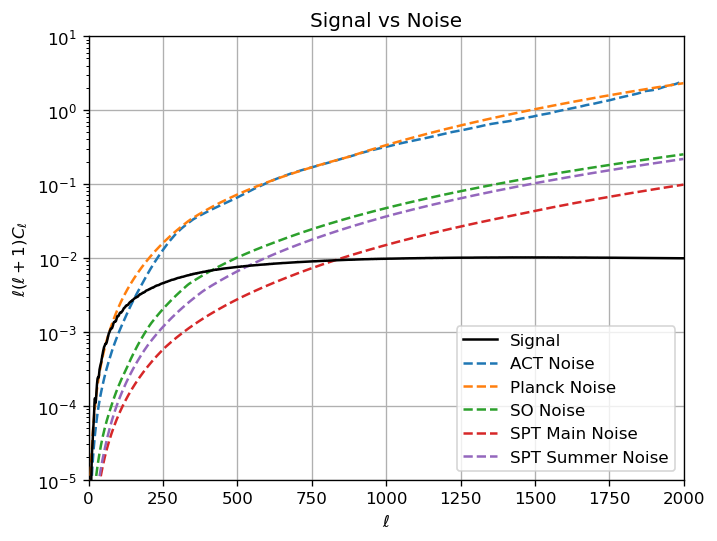

In [43]:
ls = np.arange(2000)
plt.figure(dpi = 120)
plt.plot(ls, ls*(ls+1)*ave_sig[ls], label = 'Signal', color = 'k', zorder=4)
plt.plot(ls, ls*(ls+1)*noise_ACT[ls], label = 'ACT Noise', zorder=3, linestyle = '--')
plt.plot(ls, ls*(ls+1)*f_Planck(ls), label = 'Planck Noise', zorder=3, linestyle = '--')
plt.plot(ls, ls*(ls+1)*f_SO(ls), label = 'SO Noise', zorder=3, linestyle = '--')
plt.plot(ls, ls*(ls+1)*f_SPT_Main(ls), label = 'SPT Main Noise', zorder=3, linestyle = '--')
plt.plot(ls, ls*(ls+1)*f_SPT_Summer(ls), label = 'SPT Summer Noise', zorder=3, linestyle = '--')
plt.legend()
plt.grid(zorder=0)
plt.ylabel(r'$\ell (\ell +1) C_\ell$')
plt.xlabel(r'$\ell$')
plt.title('Signal vs Noise')
plt.yscale('log')
plt.ylim([1e-5, 1e1])
plt.xlim([0, 2000])
plt.show()

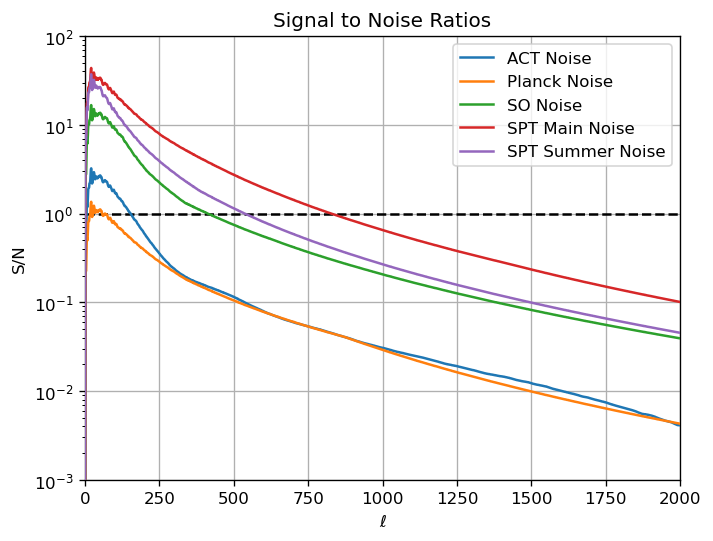

In [44]:
ls = np.arange(2000)
plt.figure(dpi = 120)
plt.plot(ls, ave_sig[ls]/noise_ACT[ls], label = 'ACT Noise', zorder=3)
plt.plot(ls, ave_sig[ls]/f_Planck(ls), label = 'Planck Noise', zorder=3)
plt.plot(ls, ave_sig[ls]/f_SO(ls), label = 'SO Noise', zorder=3)
plt.plot(ls, ave_sig[ls]/f_SPT_Main(ls), label = 'SPT Main Noise', zorder=3)
plt.plot(ls, ave_sig[ls]/f_SPT_Summer(ls), label = 'SPT Summer Noise', zorder=3)
plt.axhline(y=1, color='k', linestyle='--')
plt.legend()
plt.grid(zorder=0)
plt.ylabel(r'S/N')
plt.xlabel(r'$\ell$')
plt.title('Signal to Noise Ratios')
plt.yscale('log')
plt.ylim([1e-3, 1e2])
plt.xlim([0, 2000])
plt.show()